In [1]:
# This notebook is for DUP evaluation
# I have developed skeleton code for the evaluation of DUP using LAST and HG2-T2T v0.9 data
# This notebook is for transition from HG2-T2T v0.9 to HG2-T2T v1.0 and LAST to minimap2
# Additionally, I want to incorporate evaluating DUP+DEL cases in T2T-ACE
# TODO: 1. Transit initial analyzing code for DUP evaluation to avoid repetitive code for the same function and add more functions specific to DUP evaluation
# TODO: 2. Develop code for DUP+DEL evaluation


In [6]:
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
import T2T_ACE.alignment_utilities as au 
import T2T_ACE.validator as v
import T2T_ACE.alignment_visualization_utilities as avu
import importlib
import pandas as pd
import T2T_ACE.genomic_queries as gq

In [3]:
# Update the reference genomes to local path
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta"

In [4]:
# Load HG002 T2T reference
hg002t2t = au.load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = au.load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta


In [7]:
# Check if I could reproduce the alignment results with minimap2
# Grab sequence from hg38 interval
test_dup_svlen = len(gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13225213-13247040"))
print(f"chr1:13225213-13247040\tSVLEN={test_dup_svlen}")

chr1:13225213-13247040	SVLEN=21828


In [8]:
test_dup_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13225213-13247040")
test_dup_hg2_hits = [_ for _ in hg002t2t.map(test_dup_seq)]
test_dup_hg38_hits = [_ for _ in hg38.map(test_dup_seq)]

In [9]:
importlib.reload(au)

<module 'T2T_ACE.alignment_utilities' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/alignment_utilities.py'>

In [10]:
au.print_hits("Raw Sequence hg38", test_dup_svlen, test_dup_hg38_hits)
au.print_hits("Raw Sequence hg002", test_dup_svlen, test_dup_hg2_hits)

Raw Sequence hg38 21828: chr1_KI270766v1_alt 168680-190508	(0-21828)	21828 21828M
+Raw Sequence hg38 21828: chr1 13225212-13247040	(0-21828)	21828 21828M
+Raw Sequence hg002 21828: chr1_PATERNAL 12618932-12640734	(0-21828)	21754 21786M42I16D
+Raw Sequence hg002 21828: chr1_MATERNAL 12654730-12676536	(0-21828)	21758 21790M38I16D
+Raw Sequence hg002 21828: chr1_MATERNAL 12868221-12890084	(0-21828)	21613 21765M63I98D


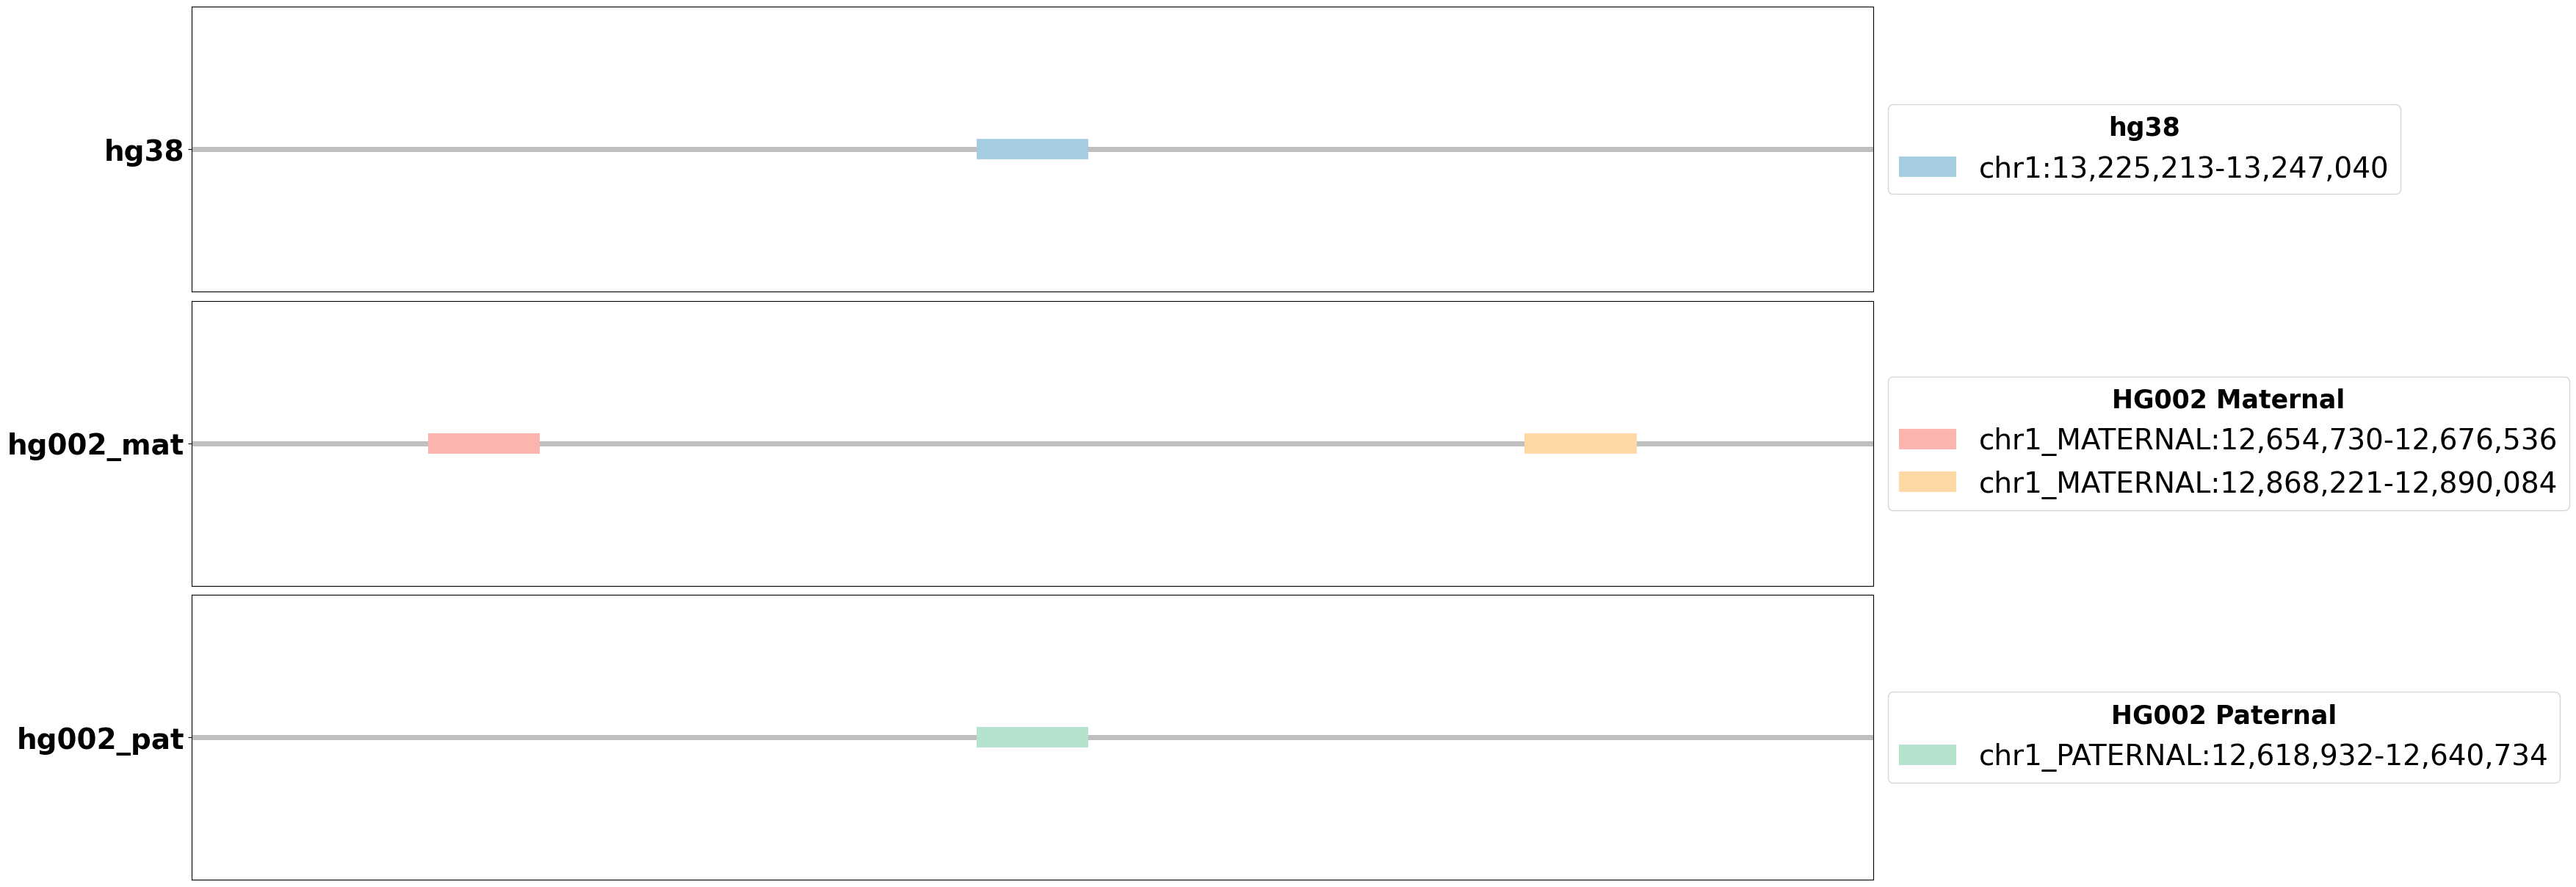

In [11]:
avu.PlotIntervals(["chr1:13225213-13247040"],['chr1_MATERNAL:12654730-12676536', 'chr1_PATERNAL:12618932-12640734', 'chr1_MATERNAL:12868221-12890084']).plot_intervals_comparison(flanking=False, ratio=15)

In [12]:
# Grab the DEL event seq within the DUP event
test_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13235347-13240700")
test_del_hg2_hits = [_ for _ in hg002t2t.map(test_del_seq)]
test_del_hg38_hits = [_ for _ in hg38.map(test_del_seq)]

In [13]:
au.print_hits("DEL Sequence hg38", len(test_del_seq), test_del_hg38_hits)
au.print_hits("DEL Sequence hg002", len(test_del_seq), test_del_hg2_hits)

+DEL Sequence hg38 5354: chr1 13235346-13240700	(0-5354)	5354 5354M
DEL Sequence hg38 5354: chr1_KI270766v1_alt 178814-184168	(0-5354)	5354 5354M
+DEL Sequence hg002 5354: chr1_MATERNAL 12661062-12666390	(0-5354)	5320 5327M27I1D
+DEL Sequence hg002 5354: chr1_PATERNAL 12625265-12630588	(0-5354)	5314 5322M32I1D
+DEL Sequence hg002 5354: chr1_MATERNAL 12878375-12883746	(0-5354)	5304 5319M35I52D


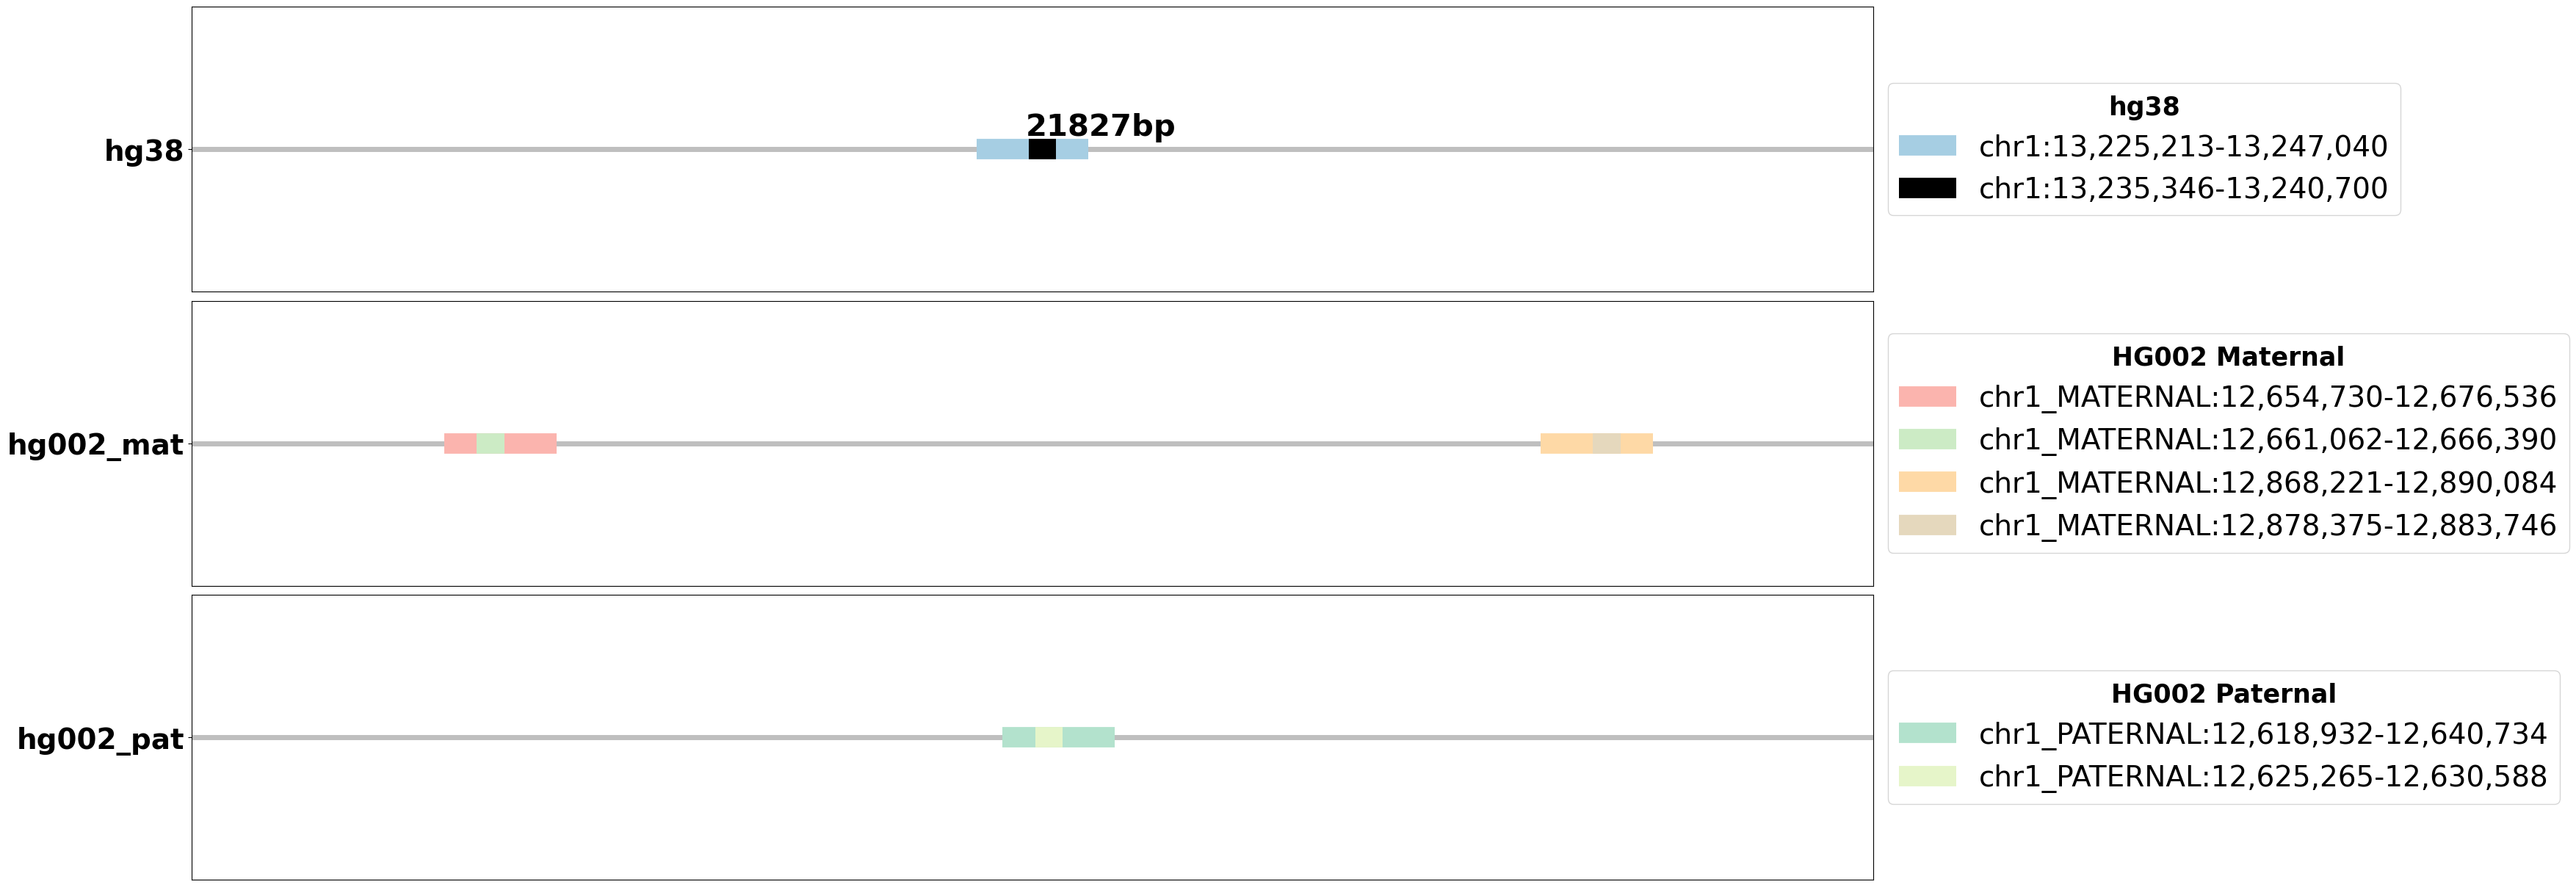

In [14]:
avu.PlotIntervals(["chr1:13225213-13247040","chr1:13235346-13240700"],['chr1_MATERNAL:12654730-12676536','chr1_MATERNAL:12661062-12666390', 'chr1_PATERNAL:12618932-12640734','chr1_PATERNAL:12625265-12630588','chr1_MATERNAL:12868221-12890084','chr1_MATERNAL:12878375-12883746']).plot_intervals_comparison(flanking=False, ratio=15)

In [15]:
# Construct the DUP sequence without the DEL sequence
# We expect to see some alignment results in HG2-T2T
dup_left_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13225213-13235346")
dup_right_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr1:13240700-13247040")

dup_no_del_seq = dup_left_del_seq + dup_right_del_seq 

In [16]:
dup_no_del_hg2_hits = [_ for _ in hg002t2t.map(dup_no_del_seq)]
dup_no_del_hg38_hits = [_ for _ in hg38.map(dup_no_del_seq)]

au.print_hits("CONSTRUCTED Sequence hg38", len(dup_no_del_seq), dup_no_del_hg38_hits)
au.print_hits("CONSTRUCTED Sequence hg002", len(dup_no_del_seq), dup_no_del_hg2_hits)

+CONSTRUCTED Sequence hg38 16475: chr1 13225212-13247040	(0-16475)	16475 16475M5353D
CONSTRUCTED Sequence hg38 16475: chr1_KI270766v1_alt 168680-190508	(0-16475)	16475 16475M5353D
CONSTRUCTED Sequence hg38 16475: chr1_KI270766v1_alt 2979-19420	(0-16475)	16192 16397M78I44D
+CONSTRUCTED Sequence hg002 16475: chr1_PATERNAL 12618932-12640734	(0-16475)	16441 16465M10I5337D
+CONSTRUCTED Sequence hg002 16475: chr1_MATERNAL 12654730-12676536	(0-16475)	16439 16464M11I5342D
+CONSTRUCTED Sequence hg002 16475: chr1_MATERNAL 12868221-12890084	(0-16475)	16310 16447M28I5416D
+CONSTRUCTED Sequence hg002 16475: chr1_PATERNAL 12789955-12806396	(0-16475)	16192 16397M78I44D


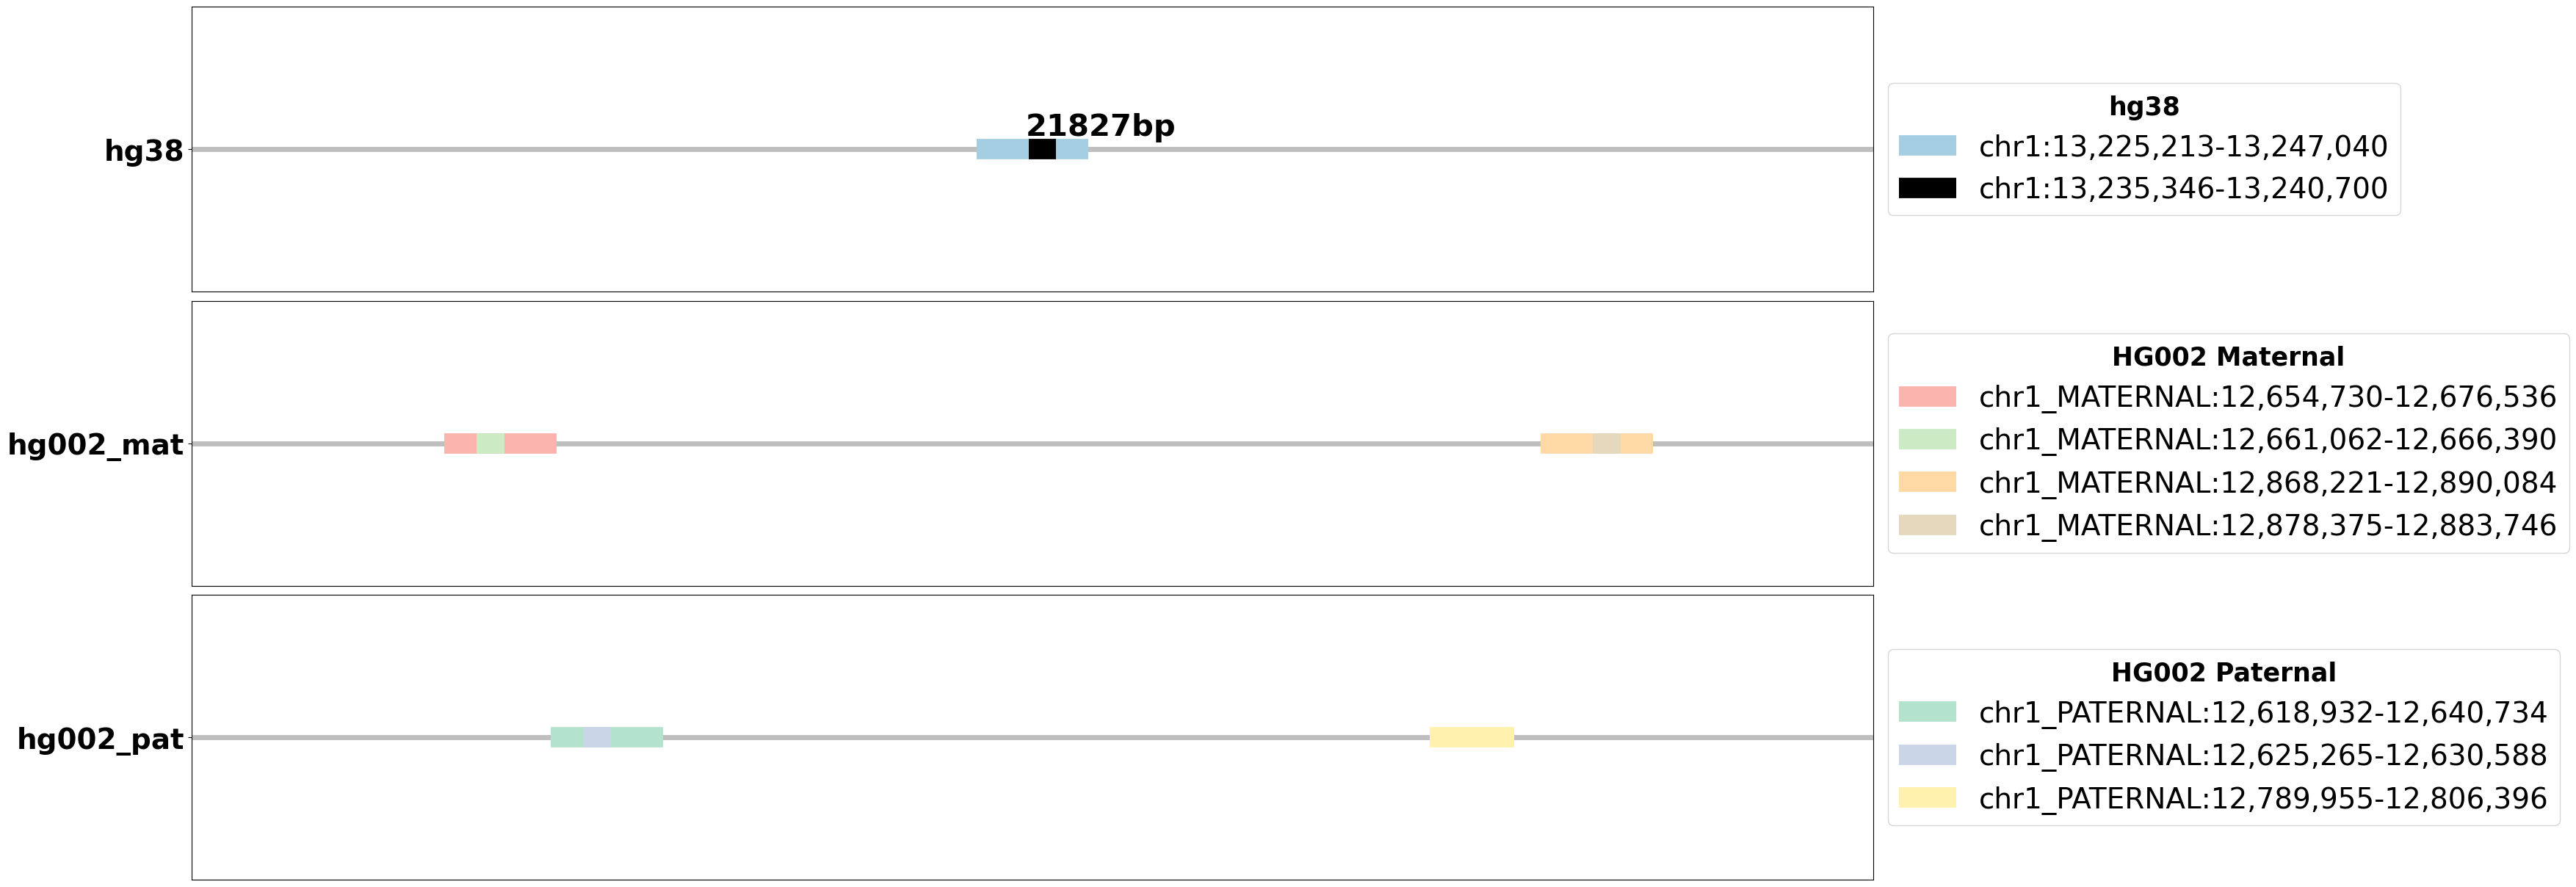

In [18]:
avu.PlotIntervals(["chr1:13225213-13247040","chr1:13235346-13240700"],['chr1_MATERNAL:12654730-12676536','chr1_MATERNAL:12661062-12666390', 'chr1_PATERNAL:12618932-12640734','chr1_PATERNAL:12625265-12630588','chr1_MATERNAL:12868221-12890084','chr1_MATERNAL:12878375-12883746','chr1_PATERNAL:12789955-12806396']).plot_intervals_comparison(flanking=False, ratio=15)

In [19]:
# Get the sequence of the DUP without the DEL alignment in HG2-Paternal
# chr1_PATERNAL 12789955-12806396
dup_no_del_hg2_seq = gq.get_sequence_from_interval(ReferenceLocations.hg002t2t, "chr1_PATERNAL:12789955-12806396")
print('Length of DUP-no-DEL alignment in HG2-paternal', len(dup_no_del_hg2_seq))

Length of DUP-no-DEL alignment in HG2-paternal 16442


In [20]:
# Check if they are a real match using mafft
au.get_multiseq_alignment([dup_no_del_seq,dup_no_del_hg2_seq], ["hg38_constructed_seq","chr1_PATERNAL:12789955-12806396"])

Running MAFFT alignment for hg38_constructed_seq_intervals.fasta


ApplicationError: Non-zero return code 127 from 'mafft --clustalout hg38_constructed_seq_intervals.fasta', message '/bin/sh: mafft: command not found'

In [21]:
HG2_DRAGEN_cnv_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1639/DRAGEN4_2_4_visualization/DRAGEN_Output/NA24385.cnv_sv.vcf"
def read_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    return df

In [22]:
HG2_DRAGEN_cnv = read_vcf(HG2_DRAGEN_cnv_path)
HG2_DRAGEN_pass_cnv = HG2_DRAGEN_cnv[HG2_DRAGEN_cnv['FILTER']=='PASS']
HG2_DRAGEN_pass_cnv.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr1,789481,DRAGEN:GAIN:chr1:789482-224014488,N,<DUP>,150,PASS,END=224014488;SVTYPE=DUP;SVLEN=223225007;CIPOS...,GT:FT:GQ:PL:PR:SR,"0/1:PASS:602:652,0,663:11,5:33,21"
1,chr1,934321,DRAGEN:LOSS:chr1:934322-934937,N,<DEL>,150,PASS,END=934937;SVTYPE=DEL;SVLEN=-616;CIGAR=1M616D;...,GT:FT:GQ:PL:PR:SR,"1/1:PASS:55:924,58,0:1,2:0,24"
3,chr1,1934923,DRAGEN:LOSS:chr1:1934924-1935584,N,<DEL>,150,PASS,END=1935584;SVTYPE=DEL;SVLEN=-661;CIGAR=1M661D...,GT:FT:GQ:PL:PR:SR,"0/1:PASS:503:553,0,707:24,1:38,18"
4,chr1,1934989,DRAGEN:LOSS:chr1:1934990-1935584,N,<DEL>,150,PASS,END=1935584;SVTYPE=DEL;SVLEN=-595;CIGAR=1M595D...,GT:FT:GQ:PL:PR:SR,"0/1:PASS:426:476,0,746:21,2:42,16"
5,chr1,2122128,DRAGEN:LOSS:chr1:2122129-2124374,N,<DEL>,150,PASS,"END=2124374;SVTYPE=DEL;SVLEN=-2246;CIPOS=0,10;...",GT:FT:GQ:PL:PR:SR,"0/1:PASS:556:606,0,635:34,2:21,20"


In [23]:
# Gather all the intervals for DEL and DUP from HG2 DRAGEN PASS
DEL_pass_intervals = []
DUP_pass_intervals = []
for index, row in HG2_DRAGEN_pass_cnv.iterrows():
    interval = row['CHROM'] + ':' + str(row['POS']) + '-' + str(row['INFO'].split('END=')[1].split(';')[0])
    if row['ALT'] == '<DEL>':
        DEL_pass_intervals.append(interval)
    elif row['ALT'] == '<DUP>':
        DUP_pass_intervals.append(interval)
print('HG2 DEL intervals:',len(DEL_pass_intervals))
print('HG2 DUP intervals:',len(DUP_pass_intervals))

HG2 DEL intervals: 996
HG2 DUP intervals: 115


In [24]:
# Remove the DUP interval that is a known FP
DUP_pass_intervals.remove("chr1:789481-224014488") 

In [25]:
# Collect all the DEL within DUP intervals
del_within_dup_list = []
for del_interval in DEL_pass_intervals:
    del_chrom = del_interval.split(':')[0]
    del_pos = int(del_interval.split(':')[1].split('-')[0])
    del_end = int(del_interval.split(':')[1].split('-')[1])
    for dup_interval in DUP_pass_intervals: 
        dup_chrom = dup_interval.split(':')[0]
        dup_pos = int(dup_interval.split(':')[1].split('-')[0])
        dup_end = int(dup_interval.split(':')[1].split('-')[1])
        if del_chrom == dup_chrom:
            if del_pos >= dup_pos and del_end <= dup_end:
                print('DEL within DUP:', del_interval, dup_interval)
                del_within_dup_list.append([del_interval, dup_interval])


DEL within DUP: chr1:13235347-13240700 chr1:13225212-13247040
DEL within DUP: chr2:89815283-89817768 chr2:89795582-89851643
DEL within DUP: chr9:40902057-40902568 chr9:40867979-41021827
DEL within DUP: chr14:19907852-19911319 chr14:19725013-19956413
DEL within DUP: chr16:34176544-34178323 chr16:34163911-34184726
DEL within DUP: chr16:34182721-34183891 chr16:34163911-34184726
DEL within DUP: chr17:22139255-22143674 chr17:22130211-22156606
DEL within DUP: chr17:45613816-46277010 chr17:45578419-46289344
DEL within DUP: chr17:46237501-46238225 chr17:45578419-46289344
DEL within DUP: chr17:46237501-46238225 chr17:46135409-46292238
DEL within DUP: chr17:46237501-46238225 chr17:46135409-46282220
DEL within DUP: chr17:46277763-46282220 chr17:45578419-46289344
DEL within DUP: chr17:46277763-46282220 chr17:46135409-46292238
DEL within DUP: chr17:46277763-46282220 chr17:46135409-46282220
DEL within DUP: chr19:24390753-24391430 chr19:24330002-24405855
DEL within DUP: chr19:27380261-27382482 chr19:

In [26]:
print('HG2 DEL within DUP:', len(del_within_dup_list))

HG2 DEL within DUP: 17


In [27]:
del_within_dup_list

[['chr1:13235347-13240700', 'chr1:13225212-13247040'],
 ['chr2:89815283-89817768', 'chr2:89795582-89851643'],
 ['chr9:40902057-40902568', 'chr9:40867979-41021827'],
 ['chr14:19907852-19911319', 'chr14:19725013-19956413'],
 ['chr16:34176544-34178323', 'chr16:34163911-34184726'],
 ['chr16:34182721-34183891', 'chr16:34163911-34184726'],
 ['chr17:22139255-22143674', 'chr17:22130211-22156606'],
 ['chr17:45613816-46277010', 'chr17:45578419-46289344'],
 ['chr17:46237501-46238225', 'chr17:45578419-46289344'],
 ['chr17:46237501-46238225', 'chr17:46135409-46292238'],
 ['chr17:46237501-46238225', 'chr17:46135409-46282220'],
 ['chr17:46277763-46282220', 'chr17:45578419-46289344'],
 ['chr17:46277763-46282220', 'chr17:46135409-46292238'],
 ['chr17:46277763-46282220', 'chr17:46135409-46282220'],
 ['chr19:24390753-24391430', 'chr19:24330002-24405855'],
 ['chr19:27380261-27382482', 'chr19:27346020-27398099'],
 ['chr19:27390844-27391527', 'chr19:27346020-27398099']]

In [42]:
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [43]:
# First Examine this DUP, see if it is a real DUP
# chr2:89795582-89851643
v.align_interval("chr2:89795582-89851643", ReferenceLocations.hg38, hg38, hg002t2t) 

(['chr2:89795581-89851643'],
 ['chr2_MATERNAL:90016247-90073488',
  'chr2_PATERNAL:89941620-89998824',
  'chr2_PATERNAL:88965829-89020444',
  'chr2_MATERNAL:89046296-89104490'])

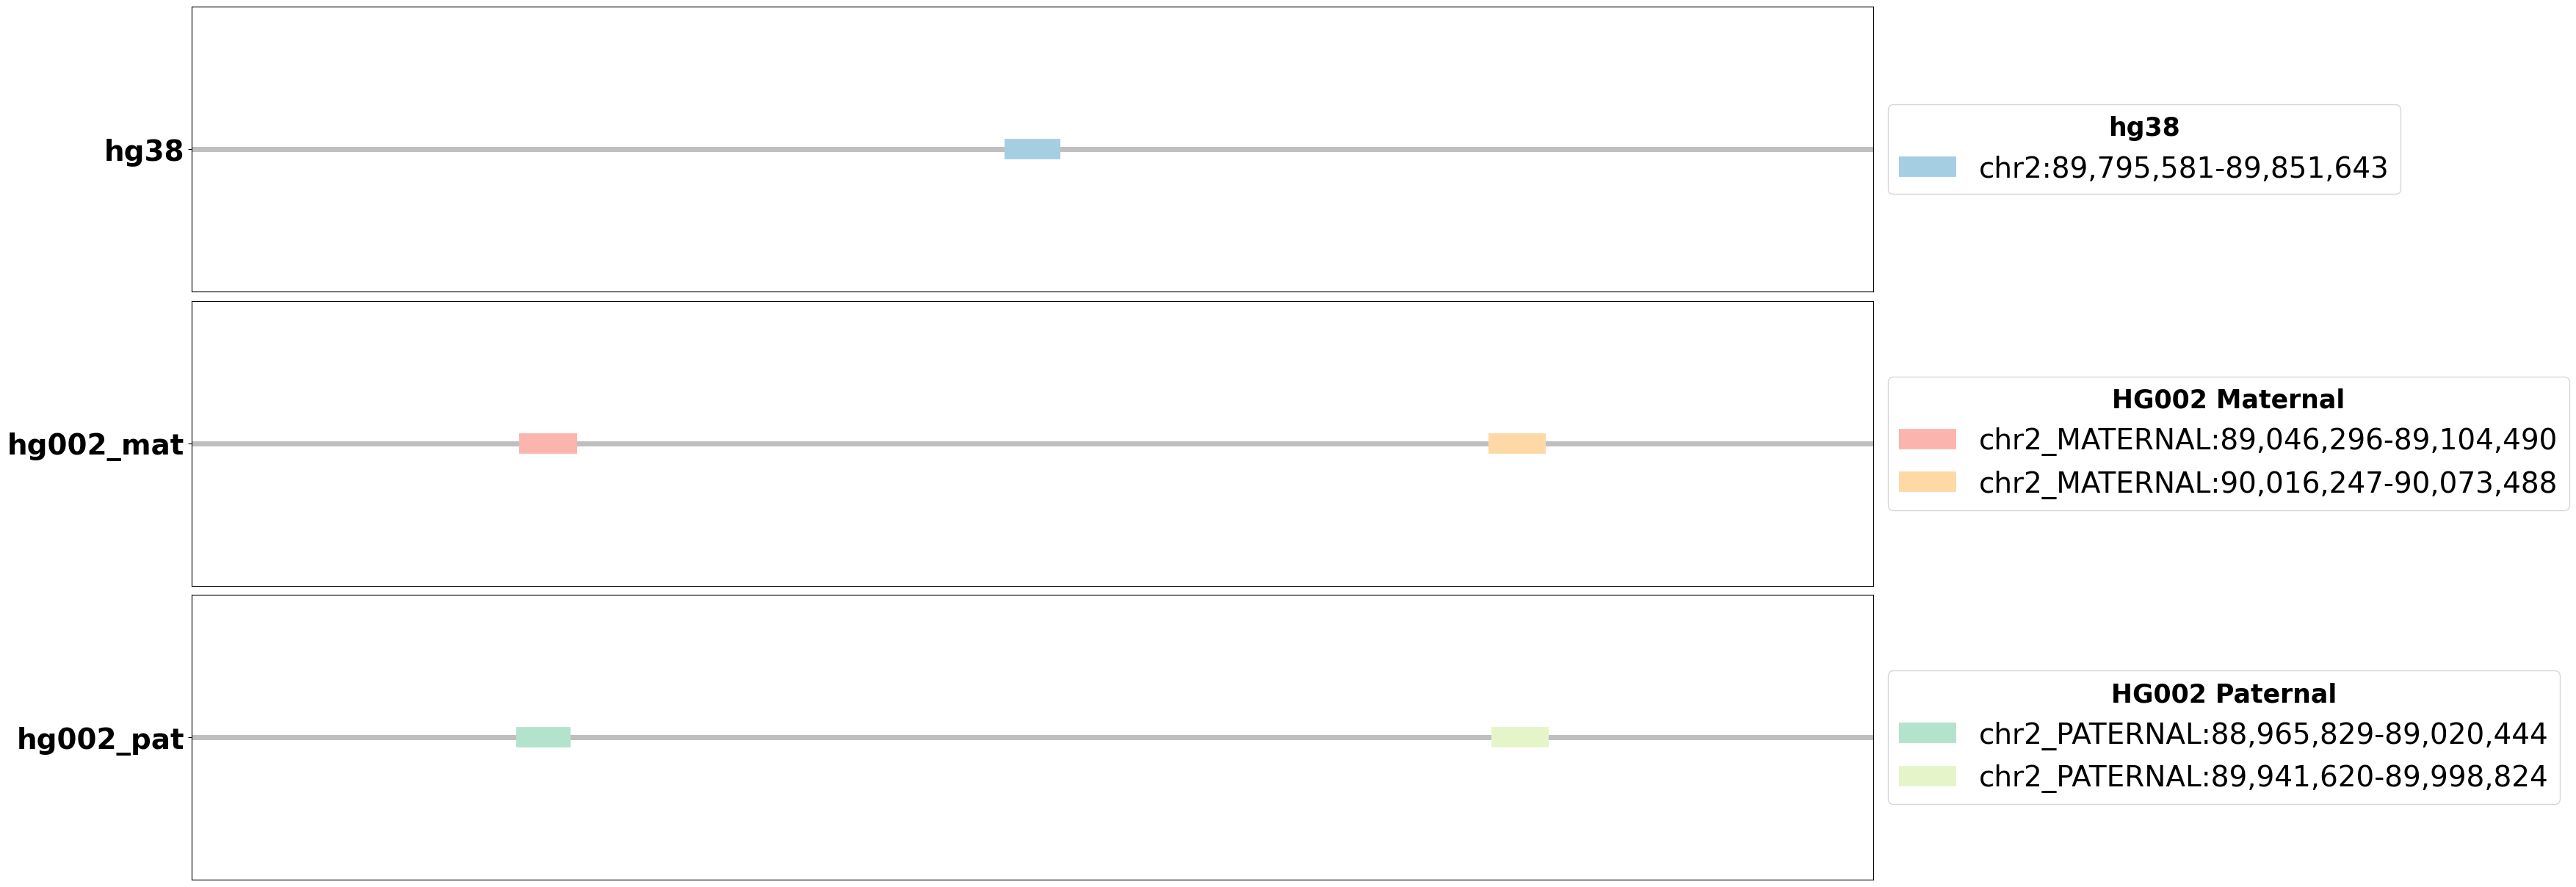

In [40]:
avu.PlotIntervals(['chr2:89795581-89851643'],
 ['chr2_MATERNAL:90016247-90073488',
  'chr2_PATERNAL:89941620-89998824',
  'chr2_PATERNAL:88965829-89020444',
  'chr2_MATERNAL:89046296-89104490']).plot_intervals_comparison(flanking=False, ratio=30)

In [44]:
# How many times did the DEL sequence occur in HG2-T2T?
v.align_interval("chr2:89815283-89817768", ReferenceLocations.hg38, hg38, hg002t2t) 

(['chr2:89815282-89817768'],
 ['chr2_PATERNAL:89961304-89963795', 'chr2_MATERNAL:90035956-90038437'])

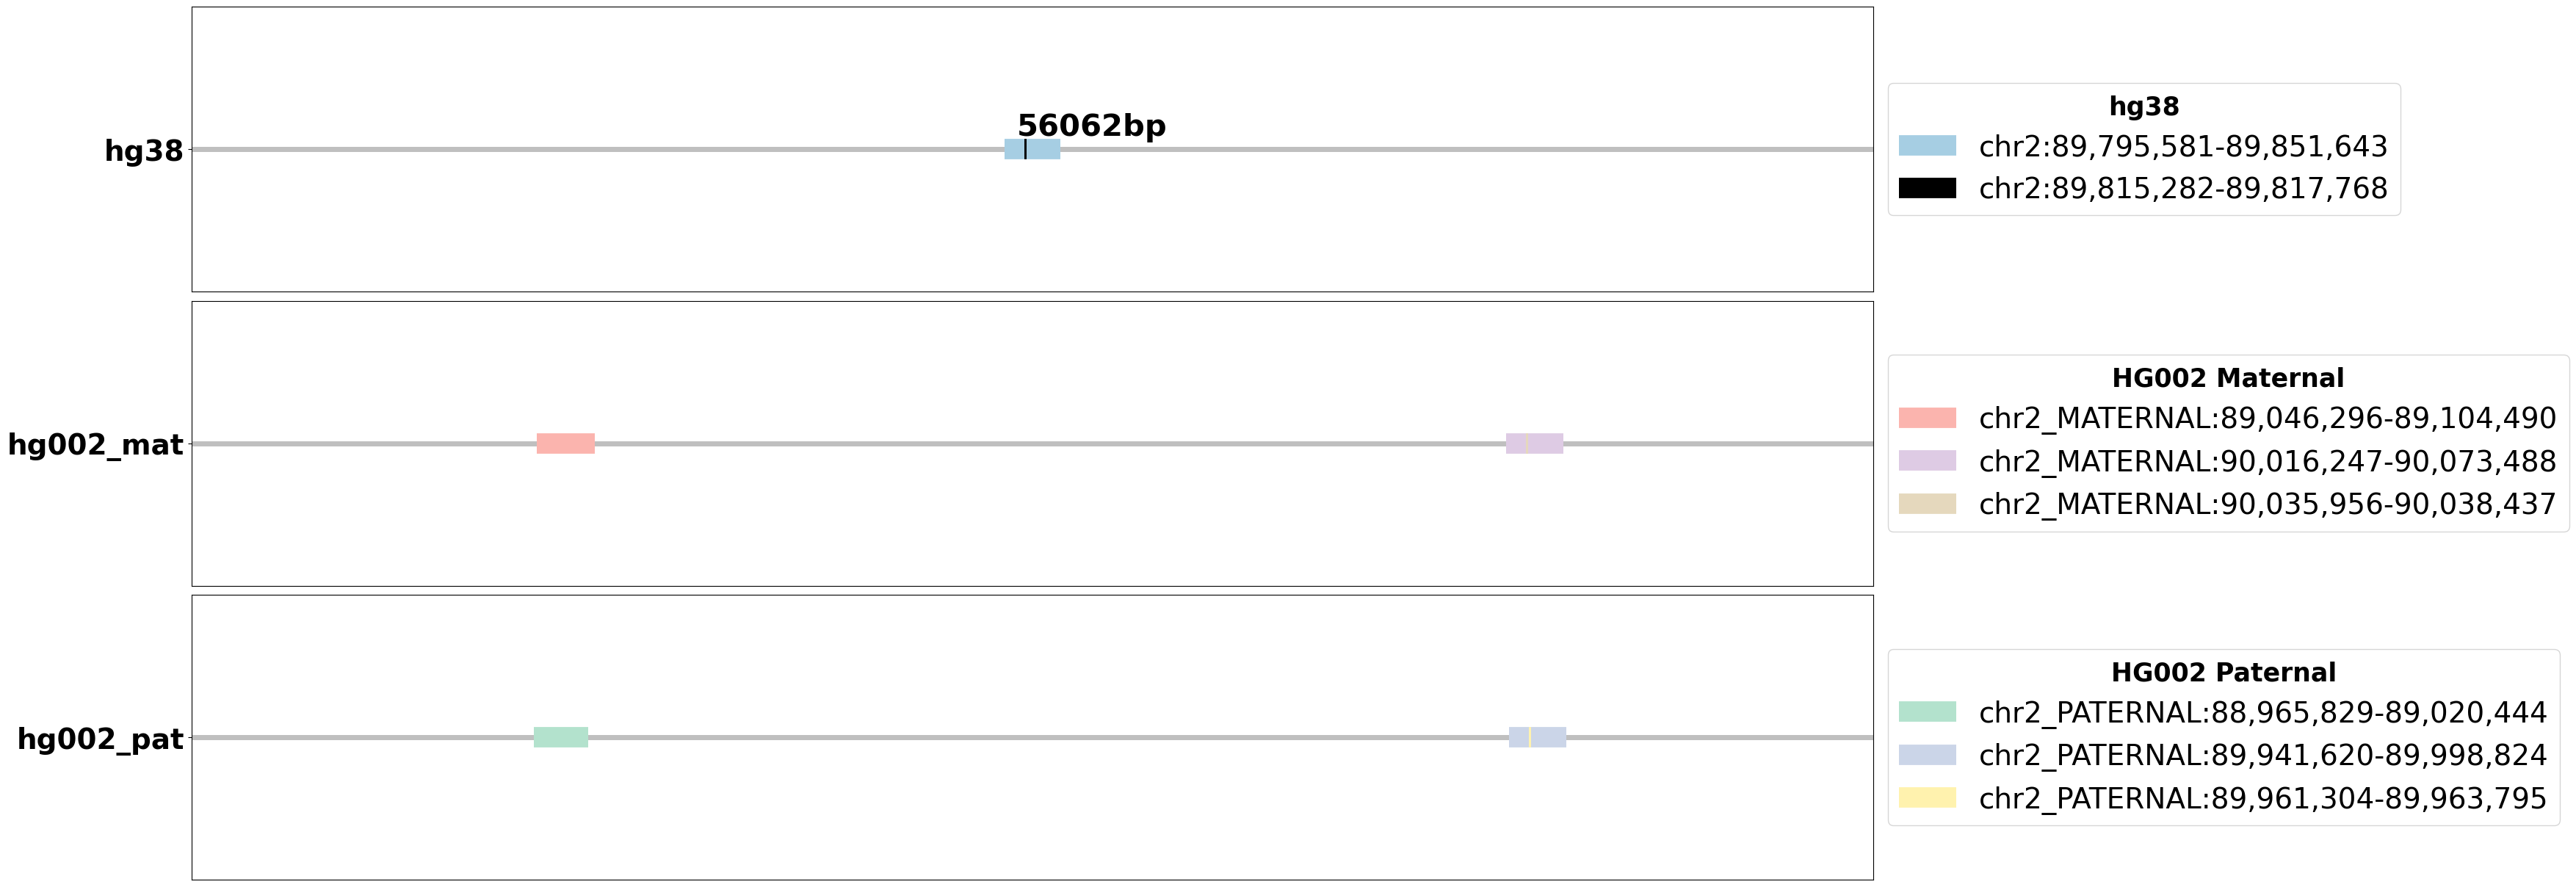

In [45]:
avu.PlotIntervals(['chr2:89795581-89851643','chr2:89815282-89817768'],
 ['chr2_MATERNAL:90016247-90073488',
  'chr2_PATERNAL:89941620-89998824',
  'chr2_PATERNAL:88965829-89020444',
  'chr2_MATERNAL:89046296-89104490',
  'chr2_PATERNAL:89961304-89963795',
  'chr2_MATERNAL:90035956-90038437']).plot_intervals_comparison(flanking=False, ratio=30)

In [46]:
# Construct the DUP sequence without the DEL sequence
# We expect to see some alignment results in HG2-T2T
dup_left_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr2:89795581-89815282")
dup_right_del_seq = gq.get_sequence_from_interval(ReferenceLocations.hg38, "chr2:89817768-89851643")

dup_no_del_seq = dup_left_del_seq + dup_right_del_seq 

In [47]:
dup_no_del_hg2_hits = [_ for _ in hg002t2t.map(dup_no_del_seq)]
dup_no_del_hg38_hits = [_ for _ in hg38.map(dup_no_del_seq)]

au.print_hits("CONSTRUCTED Sequence hg38", len(dup_no_del_seq), dup_no_del_hg38_hits)
au.print_hits("CONSTRUCTED Sequence hg002", len(dup_no_del_seq), dup_no_del_hg2_hits)

+CONSTRUCTED Sequence hg38 53578: chr2 89795580-89851643	(0-53578)	53578 53578M2485D
+CONSTRUCTED Sequence hg002 53578: chr2_MATERNAL 90016246-90073488	(0-53578)	53520 53542M36I3700D
+CONSTRUCTED Sequence hg002 53578: chr2_PATERNAL 89941619-89998824	(0-53578)	53489 53511M67I3694D
+CONSTRUCTED Sequence hg002 53578: chr2_MATERNAL 89046296-89104491	(0-53578)	53216 53277M301I4918D
+CONSTRUCTED Sequence hg002 53578: chr2_PATERNAL 88965829-89020445	(0-53578)	53198 53267M311I1349D
